# Stock Prediction

In [1]:
from pandas_datareader import data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
%matplotlib inline

In [2]:
start = datetime.datetime(2014,3,1)
end = datetime.datetime(2016,3,15)

samsung = web.DataReader("005930.KS", "yahoo", start, end)
#samsung = web.DataReader("035720.KQ", "yahoo", start, end)

In [3]:
samsung

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-03-03,1336000,1340000,1321000,1325000,242000,1283768.92
2014-03-04,1320000,1329000,1315000,1315000,158000,1274080.10
2014-03-05,1335000,1341000,1330000,1330000,149800,1288613.33
2014-03-06,1329000,1329000,1310000,1326000,172300,1284737.80
2014-03-07,1339000,1339000,1329000,1339000,150900,1297333.27
2014-03-10,1320000,1330000,1317000,1320000,173100,1278924.51
2014-03-11,1320000,1327000,1309000,1322000,181500,1280862.27
2014-03-12,1320000,1320000,1293000,1294000,251500,1253733.57
2014-03-13,1294000,1313000,1290000,1290000,235000,1249858.04


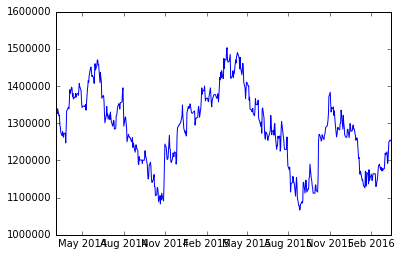

In [4]:
plt.plot(samsung.index, samsung['Close'])
plt.show()

In [5]:
t = np.array([list(samsung['Open'])])
t = np.rot90(t, -1)
t

array([[ 1336000.],
       [ 1320000.],
       [ 1335000.],
       [ 1329000.],
       [ 1339000.],
       [ 1320000.],
       [ 1320000.],
       [ 1320000.],
       [ 1294000.],
       [ 1270000.],
       [ 1275000.],
       [ 1270000.],
       [ 1280000.],
       [ 1270000.],
       [ 1269000.],
       [ 1260000.],
       [ 1269000.],
       [ 1269000.],
       [ 1290000.],
       [ 1320000.],
       [ 1345000.],
       [ 1345000.],
       [ 1350000.],
       [ 1351000.],
       [ 1377000.],
       [ 1397000.],
       [ 1387000.],
       [ 1394000.],
       [ 1369000.],
       [ 1362000.],
       [ 1365000.],
       [ 1386000.],
       [ 1370000.],
       [ 1376000.],
       [ 1370000.],
       [ 1379000.],
       [ 1374000.],
       [ 1394000.],
       [ 1409000.],
       [ 1420000.],
       [ 1404000.],
       [ 1389000.],
       [ 1380000.],
       [ 1343000.],
       [ 1354000.],
       [ 1346000.],
       [ 1346000.],
       [ 1350000.],
       [ 1355000.],
       [ 1356000.],


In [6]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

max_day = 30 
feature_num = 6
feature_dimension = max_day * feature_num

x = np.ndarray(shape=(len(samsung['Open']), feature_dimension), dtype='float32')
x *=0
print("samesung Open len :" + str(len(samsung['Open'])))

feature_tmp = [samsung['Open']
        , samsung['High']
        , samsung['Low']
        , samsung['Close']
        , samsung['Volume']
        , samsung['Adj Close']]

for i, feature in enumerate(feature_tmp):
    feature2d = np.array([list(feature)])
    feature2d = np.rot90(feature2d, -1)
    
    #mean = np.sum(feature2d)/len(feature2d)
    #variance = np.sum((feature2d-mean)*(feature2d-mean))/ (len(feature2d)-1)
    #standard_deviation = np.sqrt(variance)
    
    #feature2d = (feature2d - mean)/standard_deviation

    x[:,i*30] = feature2d[:,0]
    for day in range(1, max_day):
    
        x[day:,i*30+day] = feature2d[:(-1)*day,0]


#Erase last day
x = x[:-1,:]



samesung Open len :532


In [7]:
len(x)

531

In [8]:
#y_tmp = samsung['Open']
y = np.array(list(samsung['Open']), dtype='float32')

y_origin = y.copy()
    
#y_mean = np.sum(y)/len(y)
#variance = np.sum((y-y_mean)*(y-y_mean))/ (len(y)-1)
#standard_deviation = np.sqrt(variance)

#y = (y - y_mean) / standard_deviation

#Erase First day
y = y[1:]

In [9]:
len(y)

531

In [10]:
train_day =120

predicted_y = []
real_y = []

for i in range((-1)*train_day, -1, 1):
    predicted_y.append(SVR(kernel='linear', C=1e3).fit(x[ (-1)*train_day +i: i],y[(-1)*train_day +i : i]).predict(x[i].reshape(1,-1)))
    
real_y = y[-29:]

In [11]:
len(predicted_y)

119

In [12]:
len(real_y)

29

In [13]:
predicted_y = np.array(predicted_y)
real_y = np.array(real_y)

In [14]:
days = np.array(samsung.index)
days = days[1:]
len(days)
days

array(['2014-03-04T09:00:00.000000000+0900',
       '2014-03-05T09:00:00.000000000+0900',
       '2014-03-06T09:00:00.000000000+0900',
       '2014-03-07T09:00:00.000000000+0900',
       '2014-03-10T09:00:00.000000000+0900',
       '2014-03-11T09:00:00.000000000+0900',
       '2014-03-12T09:00:00.000000000+0900',
       '2014-03-13T09:00:00.000000000+0900',
       '2014-03-14T09:00:00.000000000+0900',
       '2014-03-17T09:00:00.000000000+0900',
       '2014-03-18T09:00:00.000000000+0900',
       '2014-03-19T09:00:00.000000000+0900',
       '2014-03-20T09:00:00.000000000+0900',
       '2014-03-21T09:00:00.000000000+0900',
       '2014-03-24T09:00:00.000000000+0900',
       '2014-03-25T09:00:00.000000000+0900',
       '2014-03-26T09:00:00.000000000+0900',
       '2014-03-27T09:00:00.000000000+0900',
       '2014-03-28T09:00:00.000000000+0900',
       '2014-03-31T09:00:00.000000000+0900',
       '2014-04-01T09:00:00.000000000+0900',
       '2014-04-02T09:00:00.000000000+0900',
       '20

ValueError: x and y must have same first dimension

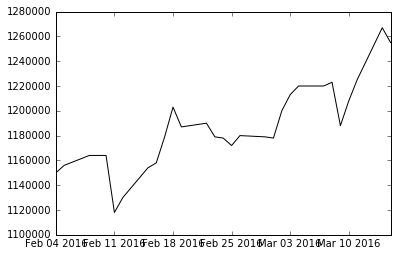

In [15]:
plt.hold('on')
plt.plot(days[-29:],real_y,c='k', label='day')
#plt.plot(days, y_rbf, c='r', label='RBF model')
plt.plot(days[-29:], predicted_y, c='g', label='Linear model')
#plt.plot(x, y_poly, c='b', label='Poly model')

plt.xlabel('days')
plt.ylabel('Normalized Open Price')
plt.title('Stock Prediction using SVR')
plt.legend()
plt.show()